In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load CIFAR-10
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# Normalisasi
x_train_full = x_train_full.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Split train jadi train + validation (4:1)
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42
)

print("Train:", x_train.shape)
print("Validation:", x_val.shape)
print("Test:", x_test.shape)

Train: (40000, 32, 32, 3)
Validation: (10000, 32, 32, 3)
Test: (10000, 32, 32, 3)


In [3]:
model1 = models.Sequential()
model1.add(layers.Conv2D(8, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(8, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))  # CIFAR-10 → 10 kelas

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [4]:
model2 = models.Sequential()
model2.add(layers.Conv2D(16, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))  # CIFAR-10 → 10 kelas

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [5]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))  # CIFAR-10 → 10 kelas
model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [6]:
def train_model(model):
    history = model.fit(
        x_train, y_train,
        epochs=20,
        validation_data=(x_val, y_val),
        batch_size=64,
        verbose = 1
    )
    return history

In [7]:
history1 = train_model(model1)
history2 = train_model(model2)
history3 = train_model(model3)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1240 - loss: 2.2711 - val_accuracy: 0.1817 - val_loss: 2.0986
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1997 - loss: 2.0558 - val_accuracy: 0.1969 - val_loss: 1.9682
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.2128 - loss: 1.9517 - val_accuracy: 0.2027 - val_loss: 1.9224
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.2111 - loss: 1.9100 - val_accuracy: 0.1947 - val_loss: 1.8949
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.2109 - loss: 1.8919 - val_accuracy: 0.2007 - val_loss: 1.8773
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.2131 - loss: 1.8706 - val_accuracy: 0.2095 - val_loss: 1.8764
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.2141 - loss: 1.8625 - val_accuracy: 0.2116 - val_loss: 1.8780
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.2173 - loss: 1.8534 - val_accur

In [8]:
# Prediksi test set
def predict_with(model):

    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Flatten label test karena aslinya (10000,1)
    y_test_flat = y_test.flatten()

    # Hitung Macro F1
    macro_f1 = f1_score(y_test_flat, y_pred_classes, average='macro')
    print("Macro F1-Score on Test Set:", macro_f1)

In [9]:
predict_with(model1)
predict_with(model2)
predict_with(model3)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Macro F1-Score on Test Set: 0.16218010597130733
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Macro F1-Score on Test Set: 0.5933649613319342
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Macro F1-Score on Test Set: 0.6214408358559074


In [10]:
import matplotlib.pyplot as plt

def plot_loss_histories(histories, labels):
    """Membuat grafik training dan validation loss dari beberapa riwayat pelatihan.

    Args:
        histories (list): Daftar objek History (hasil dari model.fit).
        labels (list): Daftar label yang sesuai untuk setiap riwayat.

    Returns:
        None (menampilkan grafik)
    """

    # Grafik Training Loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, grafik pertama
    for history, label in zip(histories, labels):
        plt.plot(history.history['loss'], label=label)
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Grafik Validation Loss
    plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, grafik kedua
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_loss'], label=label)
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()  # Menyesuaikan tata letak agar tidak tumpang tindih
    plt.show()

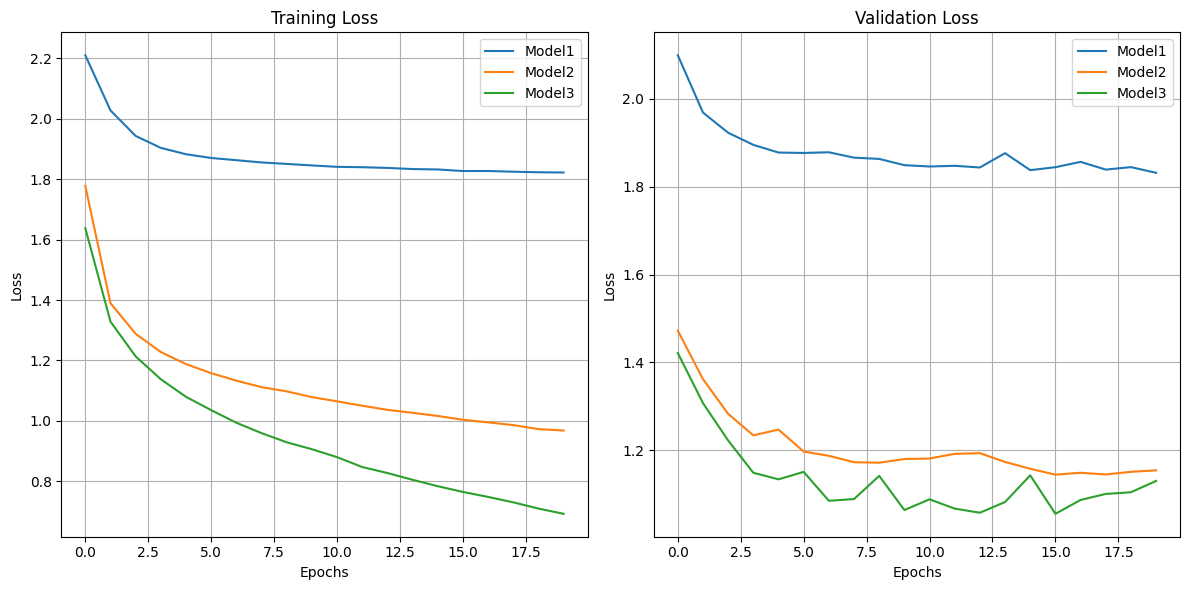

In [11]:
plot_loss_histories([history1,history2,history3],['Model1','Model2','Model3'])

In [12]:
model1.save('../models/test3_model_1.h5')
model2.save('../models/test3_model_2.h5')
model3.save('../models/test3_model_3.h5')

In [13]:
import sys
import os

dir_path = os.path.abspath(os.path.join(os.getcwd(), '..'))

if dir_path not in sys.path:
    sys.path.insert(0, dir_path)

try:
    from implementation import load
    from implementation import network
    print("Successfully imported 'load' and 'network' from the 'modules' package.")

except ImportError as e:
    print(f"Error importing modules: {e}")

Successfully imported 'load' and 'network' from the 'modules' package.


In [14]:

ScratchModel1 = load.load_scratch_model('../models/test3_model_1.h5')
ScratchModel2= load.load_scratch_model('../models/test3_model_2.h5')
ScratchModel3 = load.load_scratch_model('../models/test3_model_3.h5')


conv2d
creating new conv layer
max_pooling2d
creating new max pool layer
flatten
creating new flatten layer
dense
creating new dense layer
dense_1
creating new dense layer
conv2d_1
creating new conv layer
max_pooling2d_1
creating new max pool layer
flatten_1
creating new flatten layer
dense_2
creating new dense layer
dense_3
creating new dense layer


conv2d_2
creating new conv layer
max_pooling2d_2
creating new max pool layer
flatten_2
creating new flatten layer
dense_4
creating new dense layer
dense_5
creating new dense layer


In [15]:
def scratch_predict(model):
    preds = network.predict(model,x_test)
    preds_classes = np.argmax(preds, axis=1)

    # Flatten label test karena aslinya (10000,1)
    y_test_flat = y_test.flatten()

    # Hitung Macro F1
    scratch_macro_f1 = f1_score(y_test_flat, preds_classes, average='macro')
    # print("Macro F1-Score on Test Set:", scratch_macro_f1)
    return scratch_macro_f1

In [16]:
accuracy1 = scratch_predict(ScratchModel1)
accuracy2 = scratch_predict(ScratchModel2)
accuracy3 = scratch_predict(ScratchModel3)

mulai prediksi batch ke- 0 dari 312
mulai prediksi batch ke- 1 dari 312
mulai prediksi batch ke- 2 dari 312
mulai prediksi batch ke- 3 dari 312
mulai prediksi batch ke- 4 dari 312
mulai prediksi batch ke- 5 dari 312
mulai prediksi batch ke- 6 dari 312
mulai prediksi batch ke- 7 dari 312
mulai prediksi batch ke- 8 dari 312
mulai prediksi batch ke- 9 dari 312
mulai prediksi batch ke- 10 dari 312
mulai prediksi batch ke- 11 dari 312
mulai prediksi batch ke- 12 dari 312
mulai prediksi batch ke- 13 dari 312
mulai prediksi batch ke- 14 dari 312
mulai prediksi batch ke- 15 dari 312
mulai prediksi batch ke- 16 dari 312
mulai prediksi batch ke- 17 dari 312
mulai prediksi batch ke- 18 dari 312
mulai prediksi batch ke- 19 dari 312
mulai prediksi batch ke- 20 dari 312
mulai prediksi batch ke- 21 dari 312
mulai prediksi batch ke- 22 dari 312
mulai prediksi batch ke- 23 dari 312
mulai prediksi batch ke- 24 dari 312
mulai prediksi batch ke- 25 dari 312
mulai prediksi batch ke- 26 dari 312
mulai predi

In [17]:
print("Macro F1-Score on Test Set:", accuracy1)
print("Macro F1-Score on Test Set:", accuracy2)
print("Macro F1-Score on Test Set:", accuracy3)

Macro F1-Score on Test Set: 0.16218010597130733
Macro F1-Score on Test Set: 0.5933649613319342
Macro F1-Score on Test Set: 0.6214408358559074
